In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [2]:
x_teorico = np.linspace(0, 1.0111, 100)
y_teorico = -4.9 * (x_teorico / 4.508)**2 + 0.2465

In [3]:
data1A = np.loadtxt('Masa_1A.txt', comments='#')
x1A = data1A[:, 0]
y1A = data1A[:, 1]

data1B = np.loadtxt('Masa_1B.txt', comments='#')
x1B = data1B[:, 0]
y1B = data1B[:, 1]

data2A = np.loadtxt('Masa_2A.txt', comments='#')
x2A = data2A[:, 0]
y2A = data2A[:, 1]

data2B = np.loadtxt('Masa_2B.txt', comments='#')
x2B = data2B[:, 0]
y2B = data2B[:, 1]

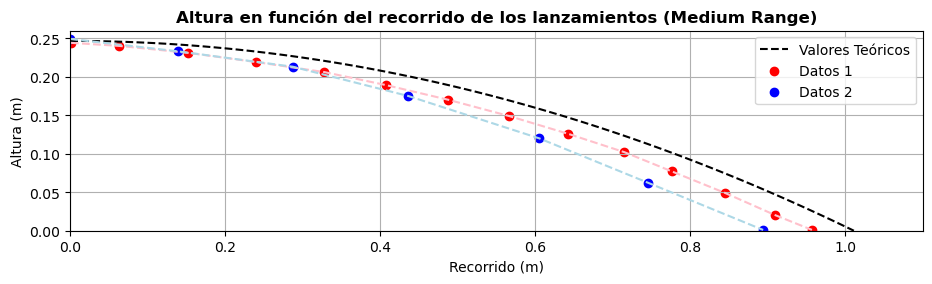

In [5]:
plt.figure(figsize=(11, 2.6))
plt.plot(x_teorico, y_teorico, '--', label='Valores Teóricos', color='black')
plt.plot(x1A, y1A, '--', color='pink')
plt.plot(x2A, y2A, '--', color='lightblue')
plt.scatter(x1A, y1A, label='Datos 1', color='red')
plt.scatter(x2A, y2A, label='Datos 2', color='blue')
plt.xlabel('Recorrido (m)')
plt.ylabel('Altura (m)')
plt.title('Altura en función del recorrido de los lanzamientos (Medium Range)', fontweight='bold')
plt.legend()
plt.xlim(0, 1.1)
plt.ylim(0, 0.26)
plt.grid(True)
plt.show()

In [8]:
X = np.concatenate((x1A, x2A))
Y = np.concatenate((y1A, y2A))

coefficients = np.polyfit(X, Y, 2)
poly = np.poly1d(coefficients)

X_fit = np.linspace(min(X), max(X), 100)
Y_fit = poly(X_fit)

a = round(coefficients[0], 2)
b = round(coefficients[1], 2)
c = round(coefficients[2], 2)

print(f"Coeficientes del ajuste cuadrático: a = {a}, b = {b}, c = {c}")
print(f"Por lo que la funcion teorica sería: y = ({a})x^2+ ({b})x+ ({c})")
print(f"Mientras la funcion experimental es: y = (-1.08)x^2+ (0)x+ ({24.65})")

Coeficientes del ajuste cuadrático: a = -0.22, b = -0.06, c = 0.25
Por lo que la funcion teorica sería: y = (-0.22)x^2+ (-0.06)x+ (0.25)
Mientras la funcion experimental es: y = (-1.08)x^2+ (0)x+ (24.65)


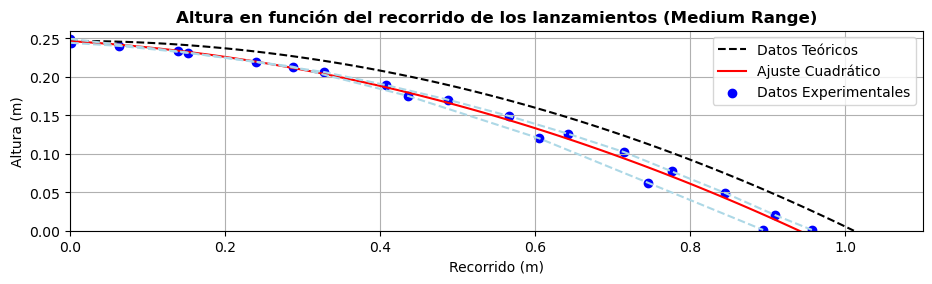

In [11]:
plt.figure(figsize=(11, 2.6))
plt.plot(x_teorico, y_teorico, '--', label='Datos Teóricos', color='black')
plt.plot(X_fit, Y_fit, label='Ajuste Cuadrático', color='Red')
plt.plot(x1A, y1A, '--', color='lightblue')
plt.plot(x2A, y2A, '--', color='lightblue')
plt.scatter(X, Y, label='Datos Experimentales', color='Blue')
plt.xlabel('Recorrido (m)')
plt.ylabel('Altura (m)')
plt.title('Altura en función del recorrido de los lanzamientos (Medium Range)', fontweight='bold')
plt.legend()
plt.xlim(0, 1.1)
plt.ylim(0, 0.26)
plt.grid(True)
plt.show()

In [62]:
DeltaX_1A = [x1A[i] - x1A[i+1] for i in range(len(x1A) - 1)]
DeltaY_1A = [y1A[i] - y1A[i+1] for i in range(len(y1A) - 1)]
V1A = [math.sqrt(x**2 + y**2) / 0.017 for x, y in zip(DeltaX_1A, DeltaY_1A)]



DeltaX_1B = [x1B[i] - x1B[i+1] for i in range(len(x1B) - 1)]
DeltaY_1B = [y1B[i] - y1B[i+1] for i in range(len(y1B) - 1)]
V1B = [math.sqrt(x**2 + y**2) / 0.017 for x, y in zip(DeltaX_1B, DeltaY_1B)]



DeltaX_2A = [x2A[i] - x2A[i+1] for i in range(len(x2A) - 1)]
DeltaY_2A = [y2A[i] - y2A[i+1] for i in range(len(y2A) - 1)]
V2A = [math.sqrt(x**2 + y**2) / 0.034 for x, y in zip(DeltaX_2A, DeltaY_2A)]


DeltaX_2B = [x2B[i] - x2B[i+1] for i in range(len(x2B) - 1)]
DeltaY_2B = [y2B[i] - y2B[i+1] for i in range(len(y2B) - 1)]
V2B = [math.sqrt(x**2 + y**2) / 0.034 for x, y in zip(DeltaX_2B, DeltaY_2B)]


V1A = [round(val, 2) for val in V1A]
V1B = [round(val, 2) for val in V1B]
V2A = [round(val, 2) for val in V2A]
V2B = [round(val, 2) for val in V2B]

print('Caso 1')
print('Velocidad del proyectil chocado:',V1A)
print('Velocidad del proyectil lanzado:',V1B)
print()
print('Caso 2')
print('Velocidad del proyectil chocado:',V2A)
print('Velocidad del proyectil lanzado:',V2B)

Caso 1
Velocidad del proyectil chocado: [3.69, 5.23, 5.22, 5.23, 4.81, 4.84, 4.75, 4.67, 4.52, 3.88, 4.38, 4.12, 3.05]
Velocidad del proyectil lanzado: [3.39, 5.63, 4.97, 4.98, 4.89, 4.7, 4.31, 4.79, 4.36, 4.61, 4.36, 3.98, 4.28]

Caso 2
Velocidad del proyectil chocado: [4.12, 4.39, 4.52, 5.23, 4.45, 4.74]
Velocidad del proyectil lanzado: [4.11, 3.31, 3.4, 3.57, 3.67, 3.69, 3.48]
